# Самостоятельный проект

## Сбор первичной информации о проекте:

### Описание проекта: 

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Задачи проекта:

#### Приоритизация гипотез.

В файле `hypothesis` - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами *Reach*, *Impact*, *Confidence*, *Effort*.

**Задачи:**
1. Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.

#### Анализ A/B-теста.

**Задачи:**
1. Проанализируйте A/B-тест:
2. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
3. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
4. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
5. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
6. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
7. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
8. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
9. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
10. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
11. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
15. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Описание данных:

**Данные для первой части:**

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части:**

1. Датасет - **orders:**
    * `transactionId` — идентификатор заказа;
    * `visitorId` — идентификатор пользователя, совершившего заказ;
    * `date` — дата, когда был совершён заказ;
    * `revenue` — выручка заказа;
    * `group` — группа A/B-теста, в которую попал заказ.

2. Датасет - **visitors:**
    * `date` — дата;
    * `group` — группа A/B-теста;
    * `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Основной проект:

### Подготовка данных:

In [1]:
# Add modules to the project
import math as mth
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
from scipy import stats as st
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get common information about datasets
def get_into(df, df_name):
    '''
    df : Dataframe,
        The dataset with data for the project
    df_name : Objects
        The name of the dataset for information
        
    Return:
        There are no return fields
    '''
    print(f'Common information about - {df_name}')
    display(df.head())
    print(df.info() , '\n')
    print(df.columns, '\n')   
    print(f'Numbers of NaN values in the dataset - {df_name}', '\n')
    print(df.isnull().sum())
    print(f'Numbers of duplicates (explicit)in the dataset - {df_name}', '\n')
    print(df.duplicated().sum())
     

# Get data
try:
    print('Using local machine')
    main_path   = 'C:/Users/Churiulin/Desktop/Yandex/Projects/DATASETS'
    df_hypo     = pd.read_csv(f'{main_path}/hypothesis.csv')
    df_orders   = pd.read_csv(f'{main_path}/orders.csv'    )
    df_visitors = pd.read_csv(f'{main_path}/visitors.csv'  )
except FileNotFoundError:
    print('Using Yandex machine')
    df_hypo     = pd.read_csv('/datasets/hypothesis.csv')
    df_orders   = pd.read_csv('/datasets/orders.csv'    )
    df_visitors = pd.read_csv('/datasets/visitors.csv'  )

Using local machine
Using Yandex machine


In [3]:
print(get_into(df_hypo, 'hypothesis')) 

Common information about - hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None 

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object') 

Numbers of NaN values in the dataset - hypothesis 

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
Numbers of duplicates (explicit)in the dataset - hypothesis 

0
None


**Комментарий по датасету - hypothesis:**

Данный набор данных выглядит нормально. Типы данных соответствуют содержащейся в таблице информации, пропусков нет, явных дубликатов нет. Единственной проблемой может выступать наличие заглавной буквы в названиях колонок и гипотез. Исправлю данную проблему.

In [4]:
df_hypo.columns = df_hypo.columns.str.lower()
df_hypo['hypothesis'] = df_hypo['hypothesis'].str.lower()
pd.set_option('display.max_colwidth', 1000)
df_hypo

,hypothesis,reach,impact,confidence,efforts
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Датасет готов к работе

In [5]:
print(get_into(df_orders, 'orders')) 

Common information about - orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None 

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object') 

Numbers of NaN values in the dataset - orders 

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Numbers of duplicates (explicit)in the dataset - orders 

0
None


**Комментарий по датасету - orders:**

В наборе данных - **orders**, есть несколько проблем, которые нужно исправить прежде чем приступить к работе:
1. Изменить регистр колонок;
2. Привести столбец  к соответствующему типу данных

Также отмечу, что в данных нет пропусков, нет полных дубликатов

In [6]:
df_orders.columns = df_orders.columns.str.lower()
df_orders['date'] = df_orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df_orders
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


In [7]:
groupA        = df_orders.query('group == "A"')
groupB        = df_orders.query('group == "B"') 
unic_visitorA = groupA['visitorid'].unique()
unic_visitorB = groupB['visitorid'].unique()

for id_A in unic_visitorA:
    for id_B in unic_visitorB:
        if id_A == id_B:
            print(f'User with the visitorid {id_B} is in both groups')

User with the visitorid 4069496402 is in both groups
User with the visitorid 199603092 is in both groups
User with the visitorid 3803269165 is in both groups
User with the visitorid 2378935119 is in both groups
User with the visitorid 237748145 is in both groups
User with the visitorid 4256040402 is in both groups
User with the visitorid 2038680547 is in both groups
User with the visitorid 1738359350 is in both groups
User with the visitorid 2458001652 is in both groups
User with the visitorid 3891541246 is in both groups
User with the visitorid 2716752286 is in both groups
User with the visitorid 3656415546 is in both groups
User with the visitorid 2686716486 is in both groups
User with the visitorid 2954449915 is in both groups
User with the visitorid 2927087541 is in both groups
User with the visitorid 3234906277 is in both groups
User with the visitorid 457167155 is in both groups
User with the visitorid 2579882178 is in both groups
User with the visitorid 3957174400 is in both gro

**Вывод:** Сравнил уникальные пользовательские ID и выявил совпадения  одного и того же ID. Есть два решения: 1 - удалить таких пользователей из иследуемого набора данных, но при этом это может вызвать противоречия с другим датасетом (visitors). 2 - оставить без изменений. 3 - в реальной задаче, я бы уточнил у разработчиков дата сета, почему есть такая проблема (возможно удасться понять, почему это случилось) после чего приступил к 1 или 2 варианту. 

Датасет готов к работе.

In [8]:
print(get_into(df_visitors, 'visitors')) 

Common information about - visitors


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None 

Index(['date', 'group', 'visitors'], dtype='object') 

Numbers of NaN values in the dataset - visitors 

date        0
group       0
visitors    0
dtype: int64
Numbers of duplicates (explicit)in the dataset - visitors 

0
None


**Комментарий по датасету - visitors:**

В наборе данных - **visitors**, есть несколько проблем, которые нужно исправить прежде чем приступить к работе:

1. Привести столбец к соответствующему типу данных
Также отмечу, что в данных нет пропусков, нет полных дубликатов, названия колонок начинаются с нижнего регистра.

In [9]:
df_visitors['date'] = df_visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
print(df_visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


Датасет готов к работе

### Приоритизация гипотез.

In [10]:
# Calculations of ICE
df_hypo['ICE'] = (df_hypo['impact'] * df_hypo['confidence']) / df_hypo['efforts']

pd.set_option('display.max_colwidth', 1000)
display(df_hypo.loc[:, ['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

,hypothesis,ICE
8,"запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Вывод:** В соответствии с методом приоритизации задач (гипотез) **ICE**, наиболее преспективными являются гипотезы под номерами 8, 0, 7, 6. 

In [11]:
# Calculations of RICE
df_hypo['RICE'] = (df_hypo['reach'] * df_hypo['impact'] * 
                   df_hypo['confidence']) / df_hypo['efforts']

pd.set_option('display.max_colwidth', 1000)
display(df_hypo.loc[:, ['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

,hypothesis,RICE
7,"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"запустить акцию, дающую скидку на товар в день рождения",16.2
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** В соответствии с методом приоритизации задач (гипотез) **RICE**, наиболее преспективными являются гипотезы под номерами 7, 2, 0, 6. 

**Общий вывод по разделу:** Исходя из полученных результатов можно отметить, что гипотезы под номерами: 7, 0, 6 являются наиболее преспективными - установлено на основании двух методов **ICE** и **RICE**. Следует отметить, что наиболее преспективная гипотезы из метода **ICE** не попала в число наиболее преспективных, согласно методу **RICE**. Основная причина заключается в том, что показатель *Reach* у данной гипотезы равен 1. В тоже время, у гипотезы 7, 0, 6 этот показатель равен 10, 3 и 5, соответственно. Кроме того, показатели *Impact*, *confidence* у этих гипотез одни из сымых высоких (из исследуемых), а показатель *Effort* напротив, один из самых низких.

### Подготовка к A/B тесту:

Прежде, чем приступить к анализу А/B теста выполню несколько подготовительных шагов:

#### Проверка гипотез о равенстве среднего количества пользователей в каждой паре датасетов. 

1. **Dataset orders:**

Проверю гипотезу *о равенстве среднего количества пользователей в каждой паре датасетов*. Я знаю, что в датасете **orders** - 1197 уникальных позиций. Соответственно разделю набор данных на две части (в зависимости от группы) и проверю гипотезу по столбцам. Отмечу также, что проверять столбцы **transactionid**, **visitorsid** и **date** не имеет смысла поскольку они не несут информации о выручке заказа.

In [12]:
group_a = df_orders.query('group == "A"')
group_b = df_orders.query('group == "B"')

alpha = 0.05  # критический уровень статистической значимости

results_AB = st.ttest_ind(group_a['revenue'], group_b['revenue'])

bonferroni_alpha = alpha # произведено три сравнения

print('p-значение для сравнения групп А и B: ', results_AB.pvalue)

if results_AB.pvalue < bonferroni_alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B')

p-значение для сравнения групп А и B:  0.403693443754076
Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B


**Вывод:** Наблюдаемые данные не подтверждают наличие разницы в средней выручке по группам не выявлено.

2. **Проверим форму распределения. Критерий Шапиро-Уилка**

In [13]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(df_orders['revenue'])
p_value = results[1]            # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


**Вывод:** Распределение не нормальное, следовательно скорее всего есть много заказов на небольшую сумму, и очень мало заказов на крупную сумму.

3. **Непараметрический тест Уилкоксона-Манна-Уитни**

In [14]:
results = st.mannwhitneyu(group_a['revenue'], group_b['revenue'], True, 'less') # ваш код

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Сделать вывод, о том что пользователи из группы Б принесли больше денег, нельзя.

2. **Dataset visitors:**

Проверю гипотезу *о равенстве среднего количества пользователей в каждой паре датасетов*. Я знаю, что в датасете **visitors** - 62 уникальных позиций. Соответственно разделю набор данных на две части (в зависимости от группы) и проверю гипотезу по столбцу **visitors**.

In [15]:
group_a = df_visitors.query('group == "A"')
group_b = df_visitors.query('group == "B"')

alpha = 0.05  # критический уровень статистической значимости

results_AB = st.ttest_ind(group_a['visitors'], group_b['visitors'])

bonferroni_alpha = alpha # произведено три сравнения

print('p-значение для сравнения групп А и B: ', results_AB.pvalue)

if results_AB.pvalue < bonferroni_alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B')

p-значение для сравнения групп А и B:  0.8435238538289684
Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B


**Вывод:** Наблюдаемые данные не подтверждают наличие разницы числа пользователей между группами

## A/B тест

### График кумулятивной выручки по группам. 

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = df_orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(
    lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])
              ].agg({'date'         : 'max'    ,
                     'group'        : 'max'    ,
                     'transactionid': 'nunique',
                     'visitorid'    : 'nunique',
                     'revenue'      : 'sum'    }), axis = 1,
).sort_values(by = ['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], df_visitors['group'] == x['group'])
              ].agg({'date'    : 'max',
                     'group'   : 'max',
                     'visitors': 'sum'}),axis = 1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated,
                                        left_on  = ['date', 'group'], 
                                        right_on = ['date', 'group'])

cumulativeData.columns = ['date'   , 'group'   ,
                          'orders' , 'buyers'  ,
                          'revenue', 'visitors']

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date'   ,
                                                                     'revenue',
                                                                     'orders' ]]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date'   ,
                                                                     'revenue',
                                                                     'orders' ]]


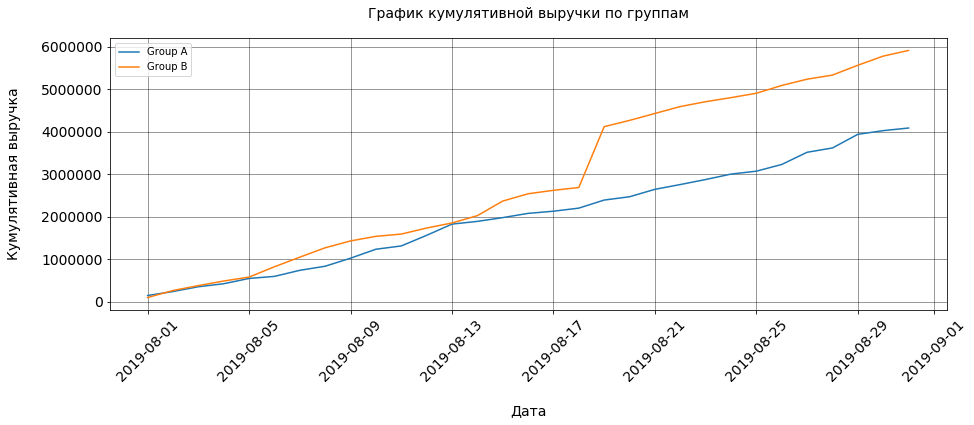

In [17]:
def plot_settings(ax, title, xlabel, ylabel, llegend = True):
    '''
    ax     : Figure 
        The main area for plot
    title  : Objects
        Plot title
    xlabel : Objects 
        Plot x axis label
    ylabel : Objects
        Plot y axis label 
    llegend : Logical
        Add or not add, the legend to the plot
    '''
    # Plot labels
    ax.set_title(title  , color = 'black', fontsize = 14, pad = 20)
    ax.set_xlabel(xlabel, color = 'black', fontsize = 14, labelpad = 20)
    ax.set_ylabel(ylabel, color = 'black', fontsize = 14, labelpad = 20)
    
    if llegend == True:
        ax.legend(loc = 'upper left', frameon = True) 
            
    ax.grid(True , which     = 'major', 
                   color     = 'k'    ,
                   linestyle = 'solid',
                   alpha     = 0.5    )

    for label in ax.xaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(45)
        label.set_fontsize(14)
    for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_fontsize(14)    

# plot 1
fig = plt.figure(figsize = (15, 5))
ax  = fig.add_subplot(111) 

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'Group A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'Group B')

plot_settings(ax, 'График кумулятивной выручки по группам', 'Дата', 'Кумулятивная выручка')  
plt.show()


**Вывод:** Выручка в двух группах равномерно увеличивается. Следует отметить, что в группе Б наблюдается резкий скачок в увеличении выручки за период с 18.08.2019 по 19.08.2019, после чего кривая вновь стабилизировалась. Скорее всего была совершена крупная покупка в этот временной интервал.

### График кумулятивного среднего чека по группам. 

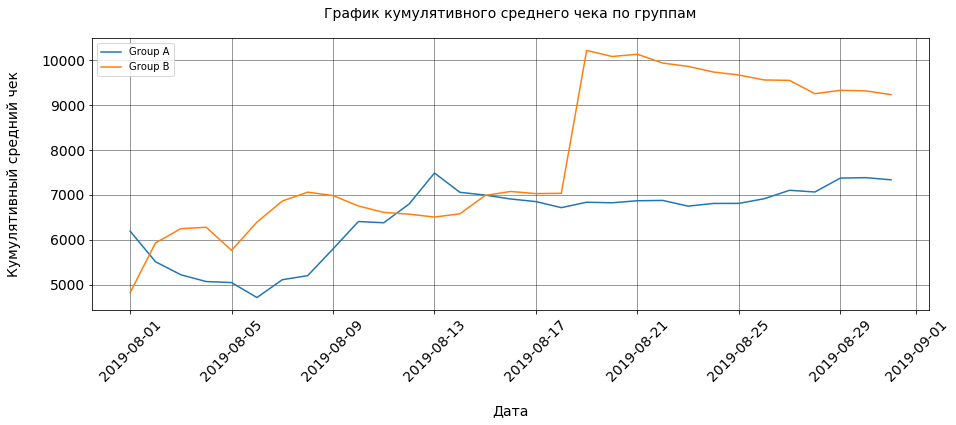

In [18]:
fig = plt.figure(figsize = (15, 5))
ax  = fig.add_subplot(111) 

plt.plot(cumulativeRevenueA['date']                                  , 
         cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], 
         label = 'Group A')

plt.plot(cumulativeRevenueB['date']                                  , 
         cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
         label = 'Group B')

plot_settings(ax, 'График кумулятивного среднего чека по группам',
                  'Дата', 'Кумулятивный средний чек'             )
plt.show()

**Вывод:** Средний чек группы А, постепенно продолжает увеличиваться, в то время как для группы Б начиная с 19.08.2019 постепенно уменьшается. Основная причина столь разного поведения связана с тем, что в группу Б попал крупный заказ.

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

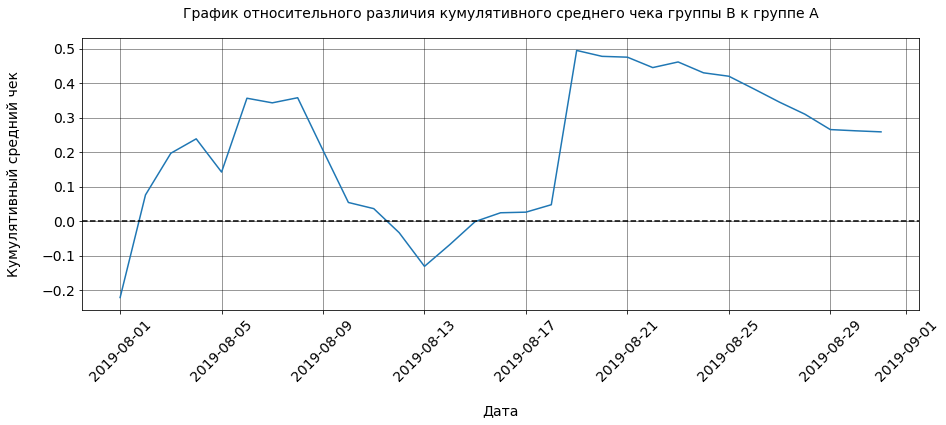

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB , 
                                                   left_on  = 'date'  ,
                                                   right_on = 'date'  ,
                                                   how      = 'left'  , 
                                                   suffixes = ['A','B'])

# cтроим отношение средних чеков
fig = plt.figure(figsize = (15, 5))
ax  = fig.add_subplot(111) 

plt.plot(mergedCumulativeRevenue['date'], 
          (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / 
          (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1 )

plot_settings(ax, 'График относительного различия кумулятивного среднего чека группы B к группе A',
                  'Дата', 'Кумулятивный средний чек', llegend = False)

# добавляем ось X
plt.axhline(y = 0, color = 'black', linestyle = '--');

**Вывод:** Результаты существенно менялись несколько раз, скорее всего в те дни, когда совершались аномальные покупки.

### График кумулятивной конверсии по группам.

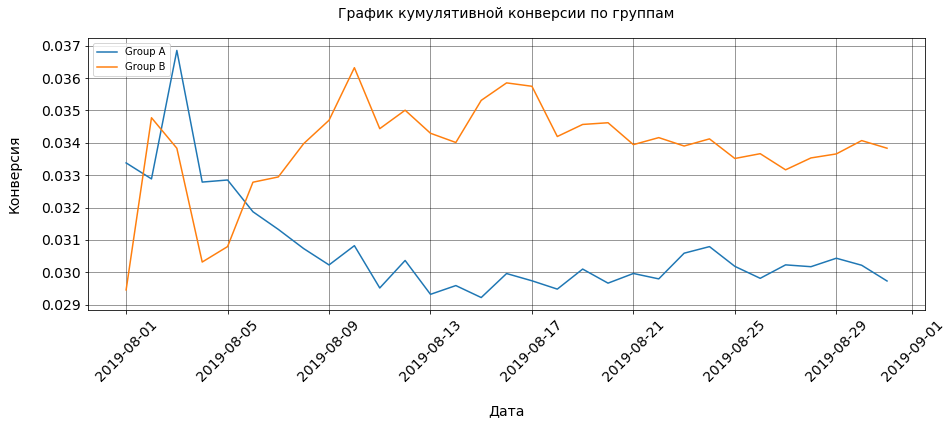

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# строим графики
fig = plt.figure(figsize = (15, 5))
ax  = fig.add_subplot(111) 

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'Group A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'Group B')

plot_settings(ax, 'График кумулятивной конверсии по группам',
                  'Дата', 'Конверсия')
plt.show()

**Вывод:** В начале теста группа А имела большую конверсию, но начиная с 4 дня эксперимента группа Б имеет стабильно большие значения конверсии, чем группа А. Графики показываю, что у группы А конверсия начиная с 13.08.2019 колеблется в границах `±1%`, в то время как у группы Б устойчивые колебания конверсия еще только формируются. Но в целом также прослеживаются колебания в диапазоне `±1%`. В последние дни эксперимента конверсия имела тенденцию на понижение.

### График относительного изменения кумулятивной конверсии группы B к группе A. 

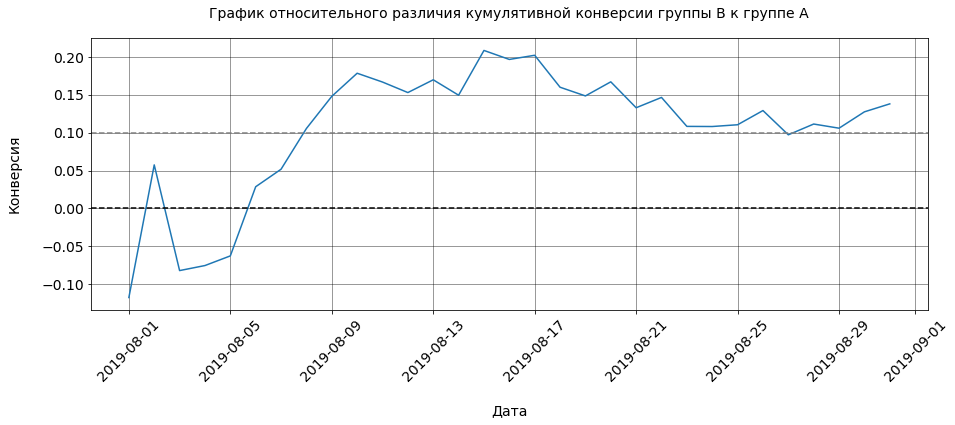

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date'      , 
                                               'conversion']].merge(cumulativeDataB[['date'      ,
                                                                                     'conversion']],
                                                                    left_on  = 'date'   , 
                                                                    right_on = 'date'   ,
                                                                    how      = 'left'   ,
                                                                    suffixes = ['A', 'B'])
# строим графики
fig = plt.figure(figsize = (15, 5))
ax  = fig.add_subplot(111) 
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1)

plot_settings(ax, 'График относительного различия кумулятивной конверсии группы B к группе A',
                  'Дата', 'Конверсия', llegend = False)

plt.axhline(y = 0  , color = 'black', linestyle = '--')
plt.axhline(y = 0.1, color = 'grey' , linestyle = '--')

plt.show()

**Вывод:** Почти с самого начала теста группа Б лидирует по конверсии, достигая 20% в середине исследуемого периода, и имяя средние значения конверсии в районе 10%.

###  Точечный график количества заказов по пользователям.

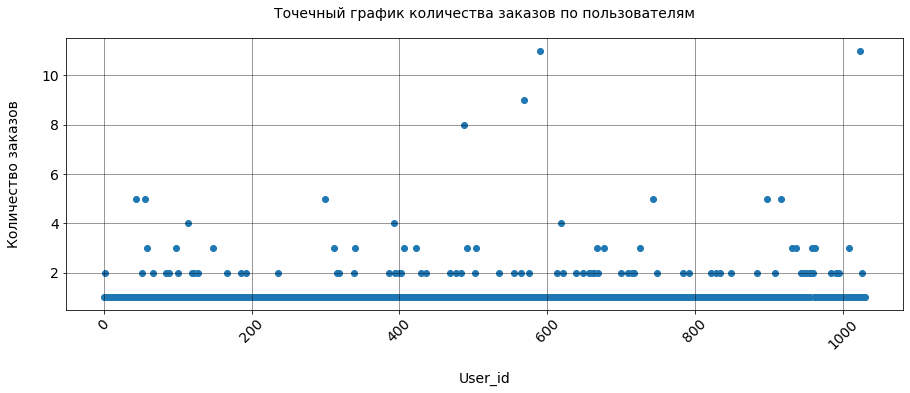

In [22]:
ordersByUsers = (df_orders.groupby('visitorid', as_index = False)
                          .agg({'transactionid': pd.Series.nunique}))

ordersByUsers.columns = ['user_id', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
fig = plt.figure(figsize = (15, 5))
ax  = fig.add_subplot(111) 

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

plot_settings(ax, 'Точечный график количества заказов по пользователям',
                  'User_id', 'Количество заказов', llegend = False)
plt.show()

**Вывод:** Большинство уникальных пользователей совершают 1 заказ, пользователей совершающих 3 и более заказа, совсем мало. Определимся, что делать с пользователями, которые совершили по 2 заказа (отбросить или оставить). 

### 95-й и 99-й перцентили количества заказов на пользователя. Границу для определения аномальных пользователей.

In [23]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


**Вывод:** Не более 5% пользователей совершали больше двух заказов, и не более 1% пользователей - более трёх заказов.

### Точечный график стоимостей заказов и 95-й и 99-й перцентили.

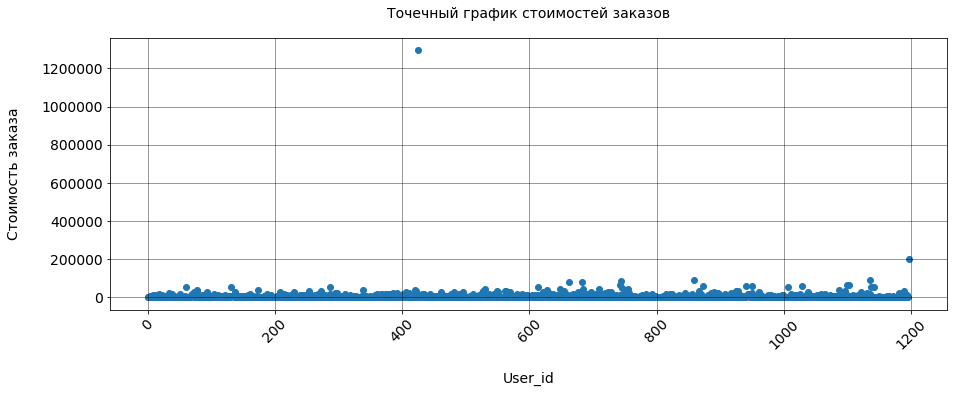

[18168.  28000.  58233.2]


In [24]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
fig = plt.figure(figsize = (15, 5))
ax  = fig.add_subplot(111) 

x_values = pd.Series(range(0, len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue']) 

plot_settings(ax, 'Точечный график стоимостей заказов',
                  'User_id', 'Стоимость заказа', llegend = False)

plt.show()

print(np.percentile(df_orders['revenue'], [90, 95, 99]))

**Вывод:** Большинство заказов совершаются на сумму до 18000 тысяч рублей. Всего лишь 5% совершают суммы заказов на 28000 тысяч рублей. 1% заказов превышает сумму 580 тысяч рублей. Также завиксирован аномальный заказ стоимостью больше 1 миллиона рублей.

### Статистическая значимость различий в конверсии между группами по «сырым» данным.

**Нулевая гипотеза:** Конверсия группы А на основе "сырых" данных, равна конверсии группы Б.  

**Альтернативные гипотеза:** конверсия группы А на основе "сырых" данных не равна конверсии группы Б.

In [25]:
# Get data for research
def data_preparation(df_visit, df_order, ngroup):
    '''
    df_visit : DataFrame
        Dataset with information about visiters
    df_order : DataFrame
        Dataset with information about orders    
    ngroup   : Objects
        The group name
    
    RETURN
        visitorsDaily       : DataFrame
        visitorsCummulative : DataFrame      
        ordersDaily         : DataFrame
        ordersCummulative   : DataFrame
    '''
    # Work with df_visitors
    visitorsDaily         = df_visit[df_visit['group'] == ngroup][['date', 'visitors']]
    visitorsDaily.columns = ['date', f'visitorsPerDate{ngroup}']
    
    visitorsCummulative  = visitorsDaily.apply(
        lambda x: visitorsDaily[visitorsDaily['date'] <= x['date']
                               ].agg({'date'                    : 'max', 
                                      f'visitorsPerDate{ngroup}': 'sum'}), axis = 1)
    
    visitorsCummulative.columns = ['date', f'visitorsCummulative{ngroup}']
    
    # Work with df_orders   
    ordersDaily = (df_order[df_order['group'] == ngroup][['date'         ,
                                                          'transactionid',
                                                          'visitorid'    , 
                                                          'revenue'      ]]        
                   .groupby('date', as_index = False)
                   .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
                  )
    
    ordersDaily.columns = ['date', f'ordersPerDate{ngroup}', f'revenuePerDate{ngroup}']
        
    ordersCummulative = ordersDaily.apply(
        lambda x: ordersDaily[ordersDaily['date'] <= x['date']
                              ].agg({'date'                    : 'max',
                                     f'ordersPerDate{ngroup}'  : 'sum',
                                     f'revenuePerDate{ngroup}' : 'sum'}), axis = 1).sort_values(by = ['date'])
    
    return visitorsDaily, visitorsCummulative, ordersDaily, ordersCummulative 


# Find conversion in research group
def get_sample(df_orders, df_data, ngroup):
    '''
    df_orders : DataFrame
        The dataset with the original data
    df_data   : DataFrame
        The merge dataframe
    ngroup : Objects
        The name of group
    RETURN
        sample : Dataframe

    ''' 
    ordersByUsers = (df_orders[df_orders['group'] == ngroup]
                     .groupby('visitorid', as_index = False)
                     .agg({'transactionid' : pd.Series.nunique})
                    )

    ordersByUsers.columns = ['userId', 'orders']

    sample = pd.concat([ordersByUsers['orders'], 
                       pd.Series(0, index = np.arange(df_data[f'visitorsPerDate{ngroup}'].sum() - 
                                                      len(ordersByUsers['orders'])), 
                               name = 'orders')], axis = 0)
    return ordersByUsers, sample

In [26]:
visitorsADaily, visitorsACummulative, ordersADaily, ordersACummulative = data_preparation(df_visitors,
                                                                                          df_orders  , 
                                                                                          'A')

visitorsBDaily, visitorsBCummulative, ordersBDaily, ordersBCummulative = data_preparation(df_visitors,
                                                                                          df_orders  , 
                                                                                          'B')

data = (ordersADaily.merge(ordersBDaily        , left_on = 'date', right_on = 'date', how = 'left')
                    .merge(ordersACummulative  , left_on = 'date', right_on = 'date', how = 'left')
                    .merge(ordersBCummulative  , left_on = 'date', right_on = 'date', how = 'left')
                    .merge(visitorsADaily      , left_on = 'date', right_on = 'date', how = 'left')
                    .merge(visitorsBDaily      , left_on = 'date', right_on = 'date', how = 'left')
                    .merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left')
                    .merge(visitorsBCummulative, left_on = 'date', right_on = 'date', how = 'left')
        )


ordersByUsersA, sampleA = get_sample(df_orders, data, 'A')
ordersByUsersB, sampleB = get_sample(df_orders, data, 'B')


print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.00840
0.138


**Вывод:** По сырым данным зафиксировано наличие различий в конверсии в группах A и B нет. Поскольку первое число p-value = 0.008 меньше 0.05 Следовательно, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, **отвергаем**. При этом относительный выйгрыш группы Б равен 13.8%. 

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**Нулевая гипотеза:** Средний чек группы А на основе "сырых" данных, равен среднему чеку группы Б.  

**Альтернативные гипотезы:** Средний чек группы А на основе "сырых" данных не равен среднему чеку группы Б.

In [27]:
bill_groupA = df_orders[df_orders['group'] == 'A']['revenue']
bill_groupB = df_orders[df_orders['group'] == 'B']['revenue']


print('{0:.3f}'.format(stats.mannwhitneyu(bill_groupA,bill_groupB)[1]))
print('{0:.3f}'.format(bill_groupB.mean() / bill_groupA.mean()-1))

0.365
0.259


**Вывод:** *P-value* значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B на 10% больше, среднего чека группы A.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным. 

**Нулевая гипотеза:** Конверсия группы А на основе "очищенных" данных, равна конверсии группы Б.  

**Альтернативные гипотезы:** конверсия группы А на основе "очищенных" данных не равна конверсии группы Б.

Ранее, я установил, что 95-й и 99-й перцентили средних чеков равны 28.000 и 582.233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

In [28]:
# Узнаем, сколько всего аномальных пользователей: 
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)


usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 28000]['visitorid']


abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
                   .drop_duplicates()
                   .sort_values()
                )

print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


**Вывод:** Всего у на 74 аномальных пользователя

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [29]:
sampleAFiltered = pd.concat([
        ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'], pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum() - 
                                                    len(ordersByUsersA['orders'])),
                               name = 'orders')], axis = 0)

sampleBFiltered = pd.concat([
        ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'], pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum() - 
                                                    len(ordersByUsersB['orders'])),
                               name = 'orders')], axis = 0)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1 ))

0.00652
0.173


**Вывод:** Результаты конверсии практически не изменились. При этом конверсия группы Б стала еще больше, чем была до очистки данных, и выгода теперь составляет 17.3 %.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**Нулевая гипотеза:** Средний чек группы А на основе "очищенных" данных, равен среднему чеку группы Б.  

**Альтернативные гипотезы:** Средний чек группы А на основе "очищенных" данных не равен среднему чеку группы Б.

In [30]:
bill_groupA = df_orders[np.logical_and(df_orders['group'] == 'A',
                        np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue']

bill_groupB = df_orders[np.logical_and(df_orders['group'] == 'B',
                        np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue']

print('{0:.3f}'.format(stats.mannwhitneyu(bill_groupA, bill_groupB)[1]))

print('{0:.3f}'.format(bill_groupB.mean() / bill_groupA.mean() - 1))

0.369
-0.020


**Вывод:** *P-value* увеличился (больше 0.05). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Разница между сегментами сократилась с 25% до 2%. При этом, теперь средний чек в группе Б на 2% меньше, чем в группе А.

## Вывод:

Имеющиеся факты:
1. Есть статистически значимые различия по конверсии между группами, как по «сырым», так и по данным после фильтрации аномалий;
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. При этом до фильтрации аномальных пользователей средний чек, в группе Б был на 25% больше, чем в группе А. После фильтрации ситуация резко изменилась и теперь средний чек пользователя группы А, на 2% больше, среднего чека пользоватлея из группы Б.
3. График различия конверсии между группами сообщает, почти с самого начала теста группа Б лидирует по конверсии, достигая 20% в середине исследуемого периода, и имяя средние значения конверсии в районе 10%. При этом показатели группы А, постепенно ухудшаются. В среднем конверсия группы Б = 3.4%, группы А = 3.0%
4. График различия конверсии между группами сообщает, что результаты группы A хуже группы B, но есть незначительная тенденция к к улучшению: 

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент A на самом деле лучше сегмента B — крайне мала.